# 주식 예측

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as pdr

from fbprophet import Prophet
from datetime import datetime

### 기아자동차 주식

In [2]:
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
kia = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end)
kia.head()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2013-01-02  57400.0  56000.0  57000.0  56300.0  2145047.0    56300.0
2013-01-03  56700.0  54100.0  56300.0  54600.0  4392999.0    54600.0
2013-01-04  54600.0  52700.0  54300.0  53600.0  3916692.0    53600.0
2013-01-07  54500.0  53600.0  53800.0  54000.0  2061988.0    54000.0
2013-01-08  54800.0  53700.0  53700.0  54500.0  1899832.0    54500.0

In [3]:
kia.tail()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2020-11-30  60400.0  57800.0  58700.0  57800.0  3810442.0    57800.0
2020-12-01  60000.0  58100.0  58700.0  59800.0  1822248.0    59800.0
2020-12-02  61000.0  59400.0  60000.0  60800.0  2964672.0    60800.0
2020-12-03  64800.0  60000.0  60800.0  64700.0  4152306.0    64700.0
2020-12-04  66600.0  64300.0  65000.0  65400.0  3866516.0    65400.0

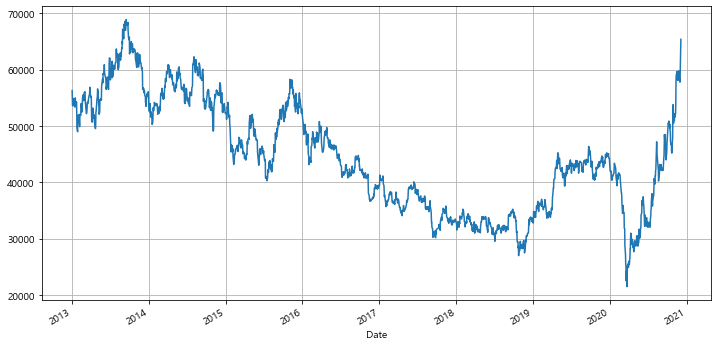

In [4]:
kia.Close.plot(figsize=(12, 6), grid=True)
plt.show()

In [5]:
kia_trunc = kia[:'2020-06-30']
kia_trunc.tail()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2020-06-24  34450.0  32550.0  32700.0  33750.0  2345625.0    33750.0
2020-06-25  33200.0  32500.0  33050.0  32550.0  1495320.0    32550.0
2020-06-26  33500.0  32850.0  33100.0  33050.0  1329381.0    33050.0
2020-06-29  32500.0  31900.0  32300.0  32100.0  1259626.0    32100.0
2020-06-30  32650.0  32050.0  32600.0  32050.0  1193847.0    32050.0

In [6]:
df = pd.DataFrame({'ds': kia_trunc.index, 'y': kia_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds        y
0 2013-01-02  56300.0
1 2013-01-03  54600.0
2 2013-01-04  53600.0
3 2013-01-07  54000.0
4 2013-01-08  54500.0

In [7]:
model = Prophet(daily_seasonality=True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [8]:
future = model.make_future_dataframe(periods=184)
future.tail()

ds
2015 2020-12-27
2016 2020-12-28
2017 2020-12-29
2018 2020-12-30
2019 2020-12-31

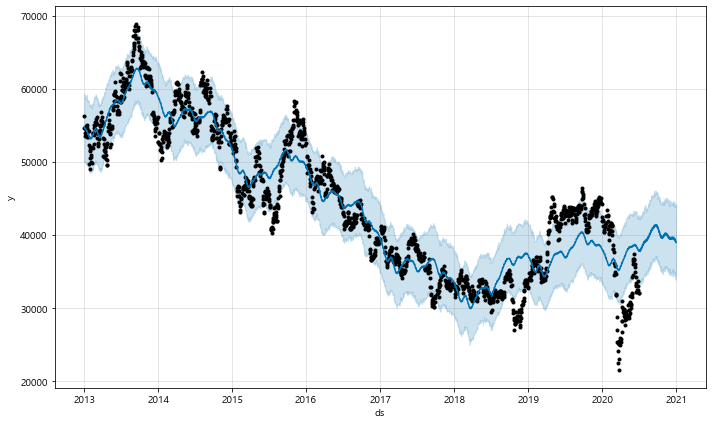

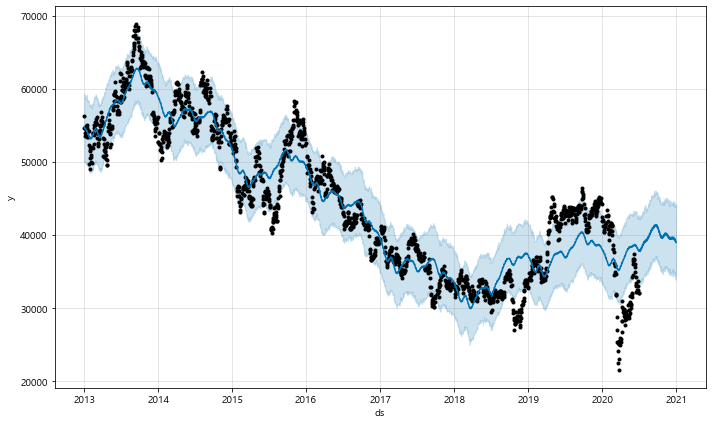

In [9]:
forecast = model.predict(future)
model.plot(forecast)

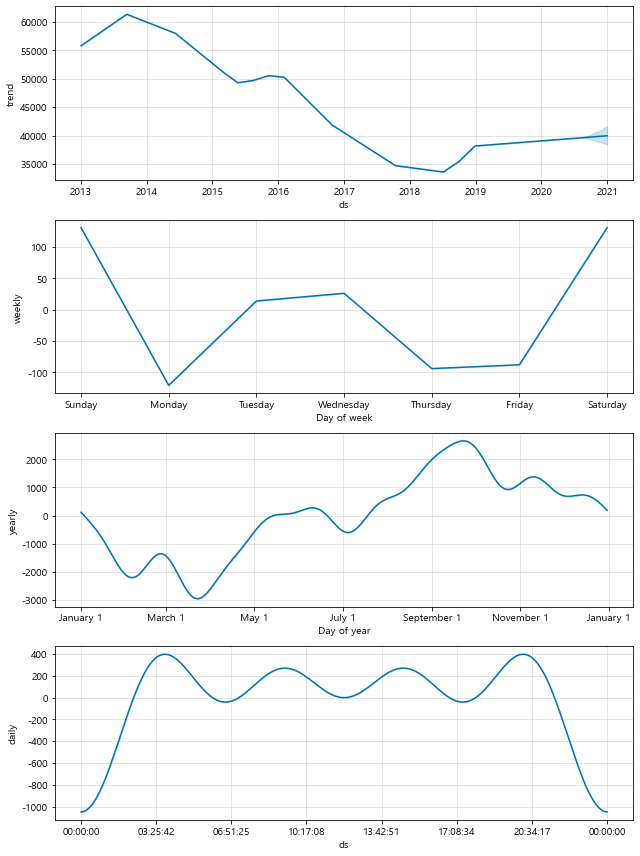

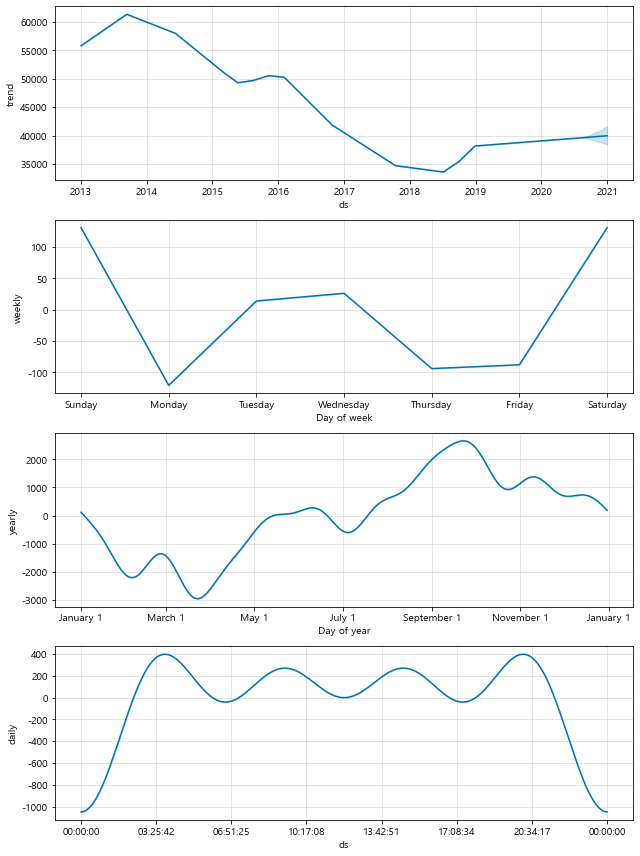

In [10]:
model.plot_components(forecast)

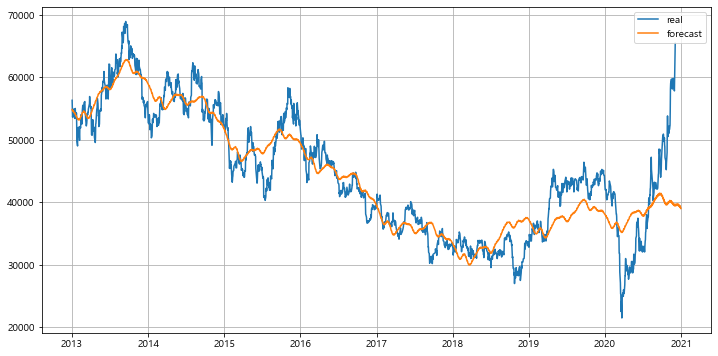

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(kia.index, kia.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 데브시스터즈(DEVSISTERS) 주식

In [12]:
import pandas_datareader.data as web

In [13]:
start = datetime(2015, 1, 1)
end = datetime(2020, 12, 6)
devs = web.DataReader('194480', 'naver', start=start, end=end)
devs.head()

Open   High    Low  Close  Volume
Date                                          
2015-01-02  48050  51600  46650  50800  502272
2015-01-05  50900  51300  49100  51300  277955
2015-01-06  50300  52000  49000  49000  252731
2015-01-07  48400  51200  46100  47950  727586
2015-01-08  48600  49350  47500  48550  233711

In [14]:
devs.tail()

Open   High    Low  Close  Volume
Date                                          
2020-11-30   9580  12400   9550  12400  551201
2020-12-01  11950  12200  11200  11600  333533
2020-12-02  11600  11600  11250  11450   97130
2020-12-03  11850  12600  11250  11650  323096
2020-12-04  11500  13800  11300  12700  376608

In [15]:
devs = devs.apply(pd.to_numeric)

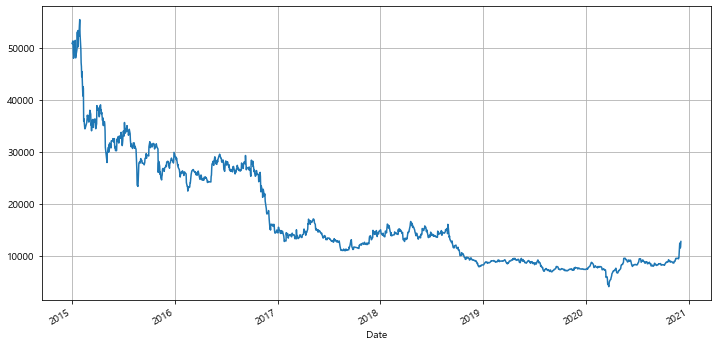

In [16]:
devs.Close.plot(figsize=(12, 6), grid=True)
plt.show()

In [17]:
devs_trunc = devs[:'2020-12-07']

In [18]:
df = pd.DataFrame({'ds': devs_trunc.index, 'y': devs_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds      y
0 2015-01-02  50800
1 2015-01-05  51300
2 2015-01-06  49000
3 2015-01-07  47950
4 2015-01-08  48550

In [19]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)

In [20]:
future = model.make_future_dataframe(periods=180)
future.tail()

ds
1633 2021-05-29
1634 2021-05-30
1635 2021-05-31
1636 2021-06-01
1637 2021-06-02

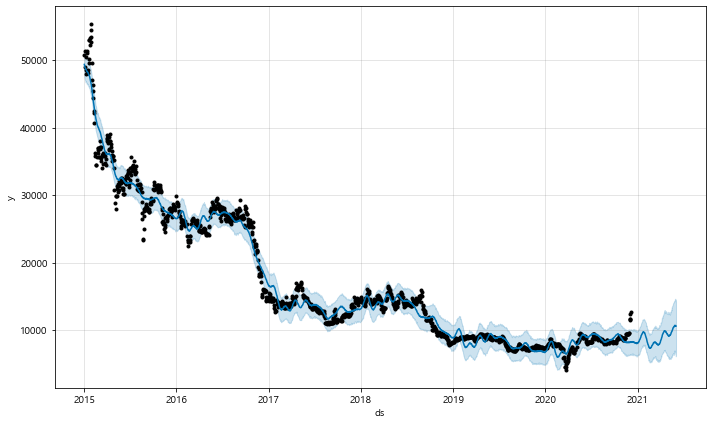

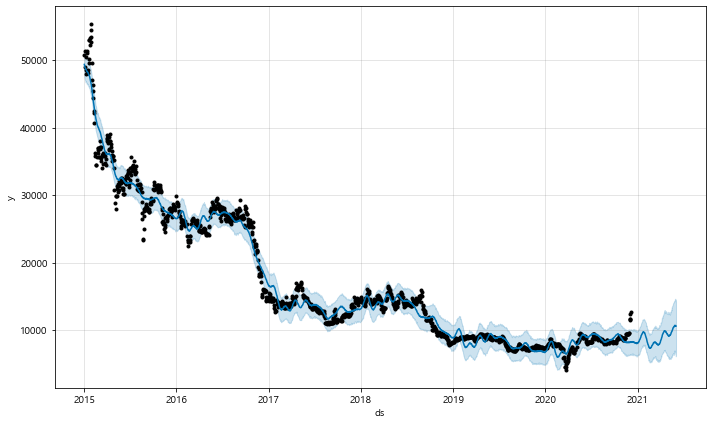

In [21]:
forecast = model.predict(future)
model.plot(forecast)

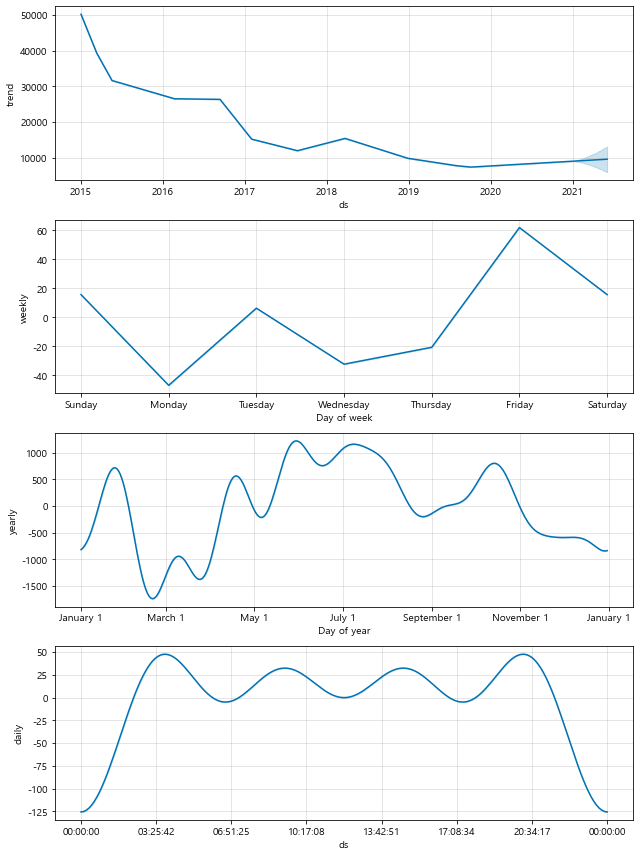

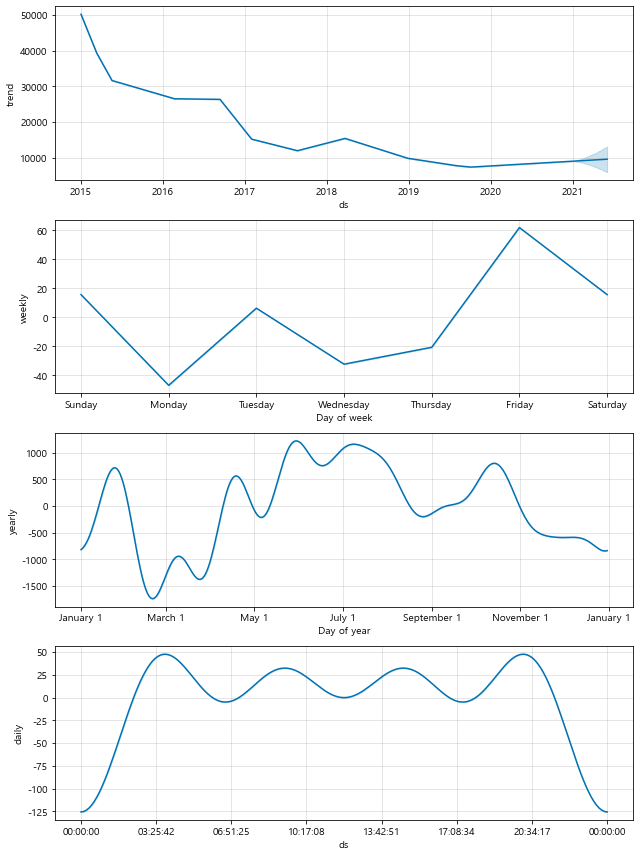

In [22]:
model.plot_components(forecast)

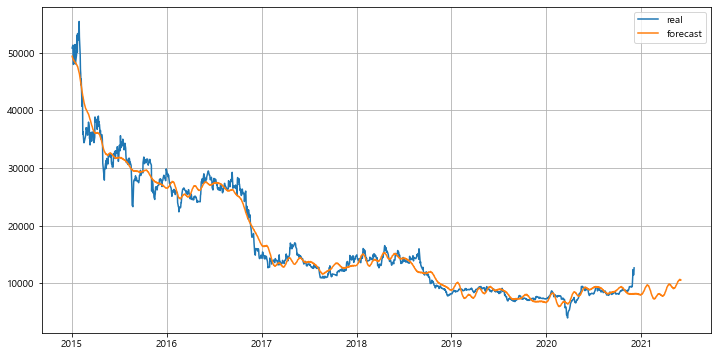

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(devs.index, devs.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 삼성전자 주식

In [24]:
samsung = web.DataReader('005930', 'naver', start=start, end=end)
samsung.head()

Open   High    Low  Close  Volume
Date                                          
2015-01-02  26799  26799  26540  26600  175499
2015-01-05  26720  26720  26260  26660  202790
2015-01-06  26300  26340  25760  25900  304710
2015-01-07  25880  26220  25640  26140  286455
2015-01-08  26780  26780  26199  26280  289552

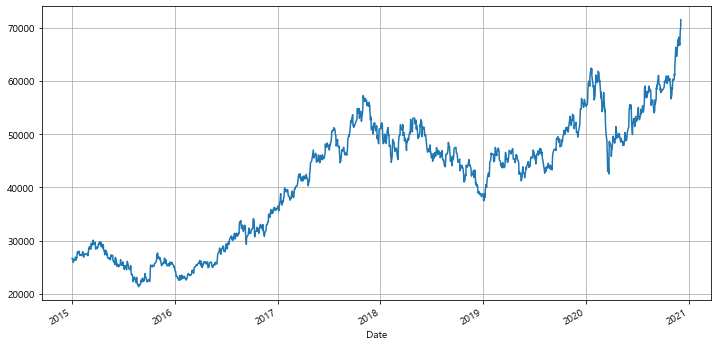

In [25]:
samsung = samsung.apply(pd.to_numeric)
samsung.Close.plot(figsize=(12, 6), grid=True)
plt.show()

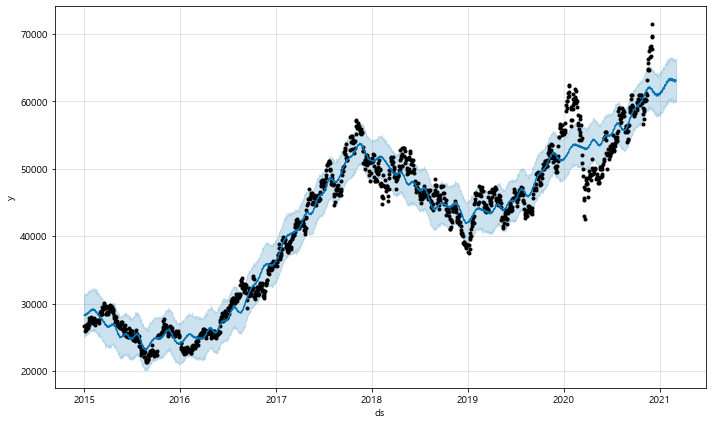

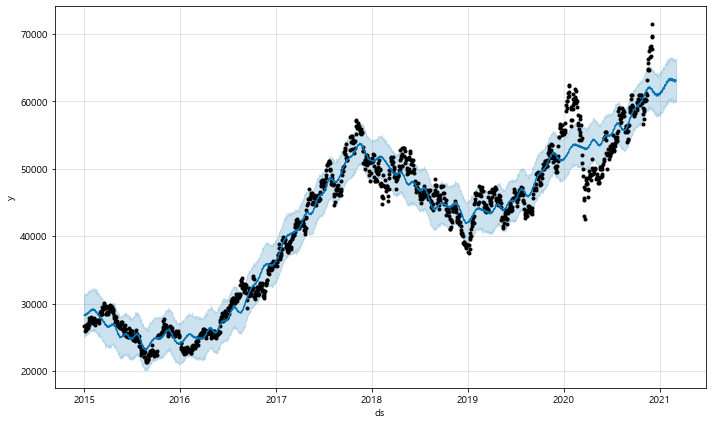

In [26]:
samsung_trunc = samsung[:'2020-12-07']
df = pd.DataFrame({'ds': samsung_trunc.index, 'y': samsung_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
model.plot(forecast)

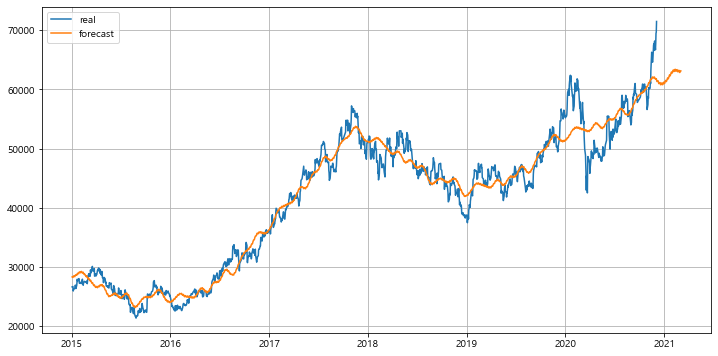

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(samsung.index, samsung.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()


### 카카오게임즈 주식

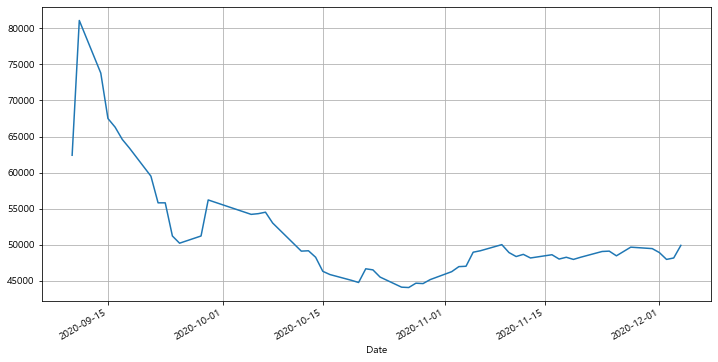

In [28]:
kakaogames = web.DataReader('293490', 'naver', start=datetime(2020, 9, 10), end=end)
kakaogames = kakaogames.apply(pd.to_numeric)
kakaogames.Close.plot(figsize=(12, 6), grid=True)
plt.show()

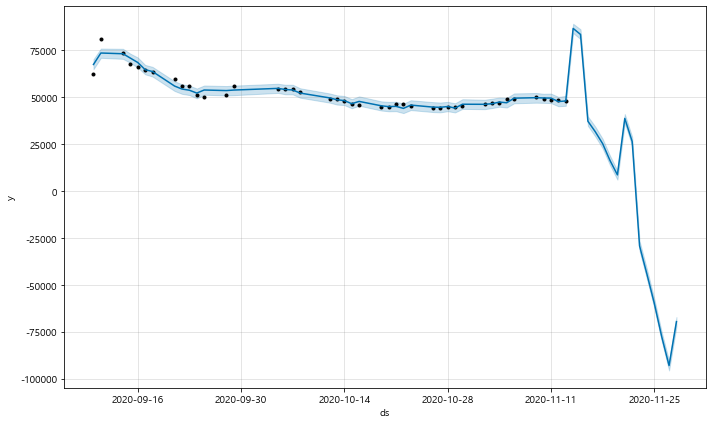

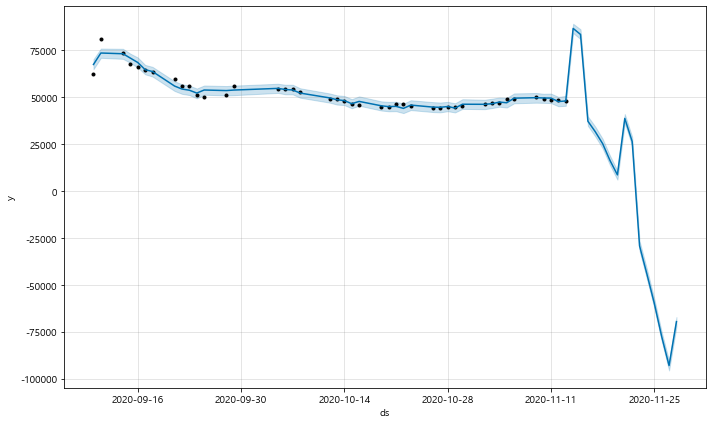

In [29]:
kakaogames_trunc = kakaogames[:'2020-11-15']
df = pd.DataFrame({'ds': kakaogames_trunc.index, 'y': kakaogames_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)
model.plot(forecast)

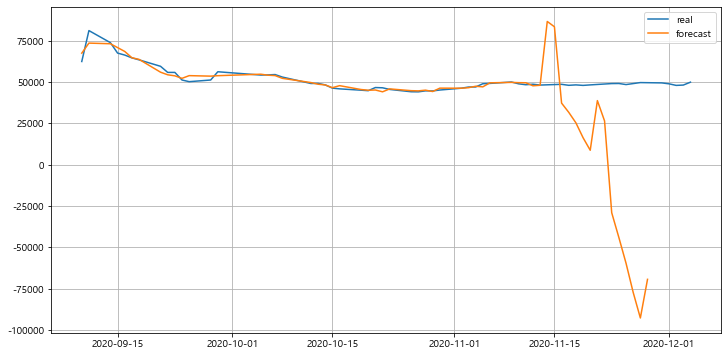

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(kakaogames.index, kakaogames.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### JW 신약 주식

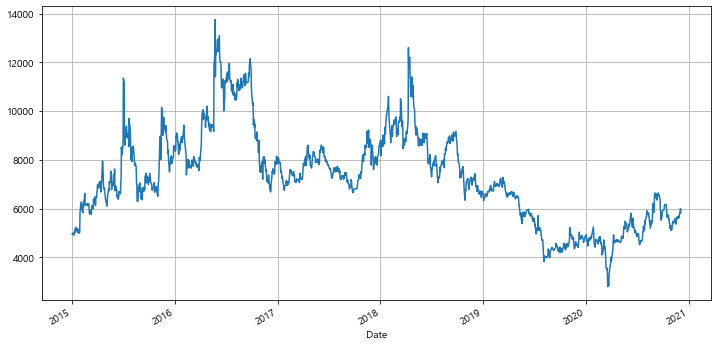

In [31]:
jw = web.DataReader('067290', 'naver', start=start, end=end)
jw = jw.apply(pd.to_numeric)
jw.Close.plot(figsize=(12, 6), grid=True)
plt.show()

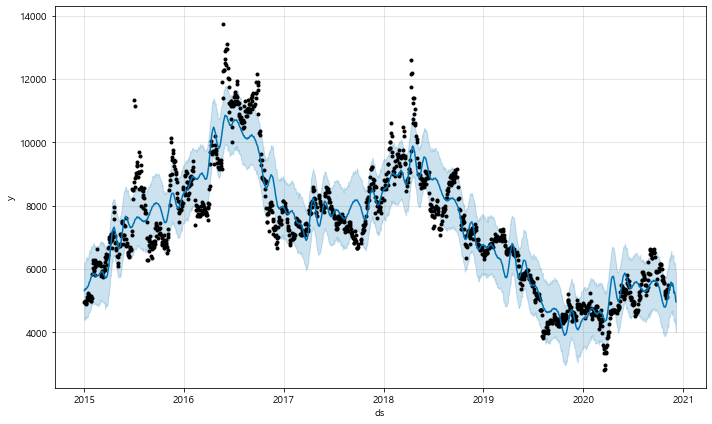

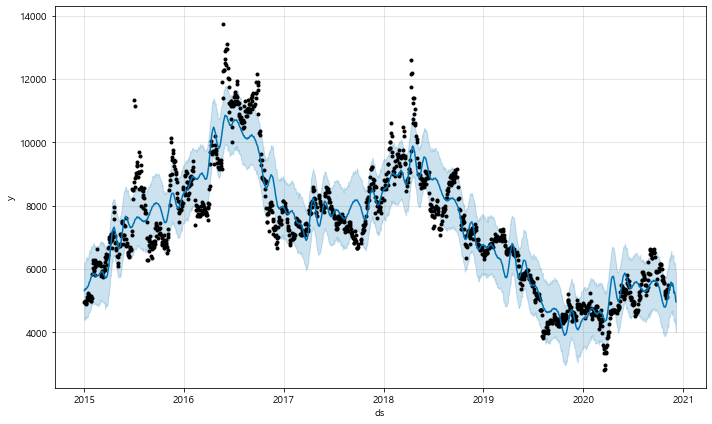

In [32]:
jw_trunc = jw[:'2020-11-7']
df = pd.DataFrame({'ds': jw_trunc.index, 'y': jw_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)

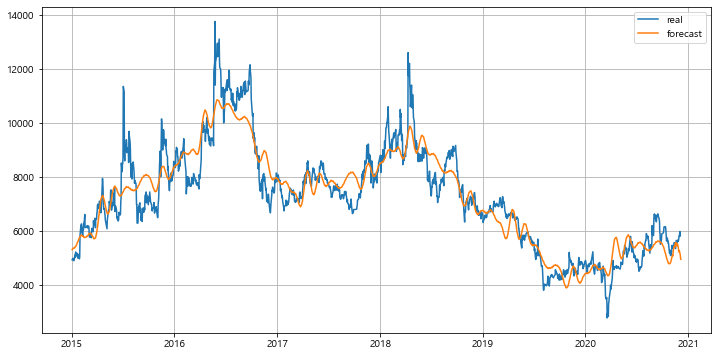

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(jw.index, jw.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 마이크로소프트 주식

In [34]:
ms = pdr.get_data_yahoo('MSFT', start=start, end=end)
ms.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2014-12-31  47.439999  46.450001  46.730000  46.450001  21552500.0  41.263744
2015-01-02  47.419998  46.540001  46.660000  46.759998  27913900.0  41.539135
2015-01-05  46.730000  46.250000  46.369999  46.330002  39673900.0  41.157158
2015-01-06  46.750000  45.540001  46.380001  45.650002  36447900.0  40.553074
2015-01-07  46.459999  45.490002  45.980000  46.230000  29114100.0  41.068310

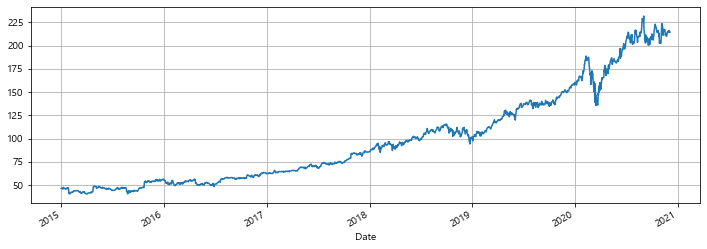

In [35]:
ms.Close.plot(figsize=(12, 4), grid=True)
plt.show()

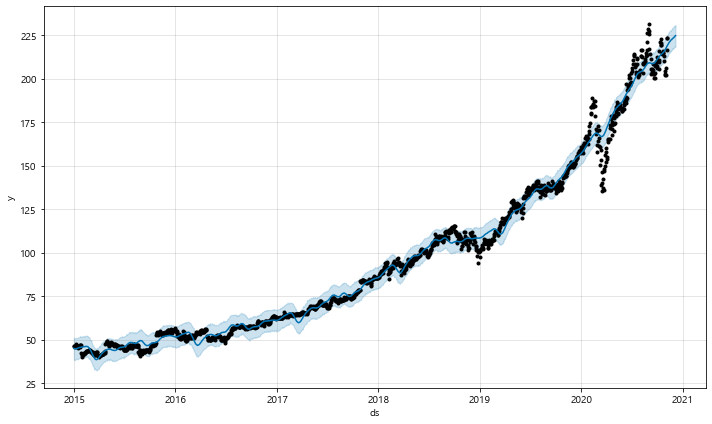

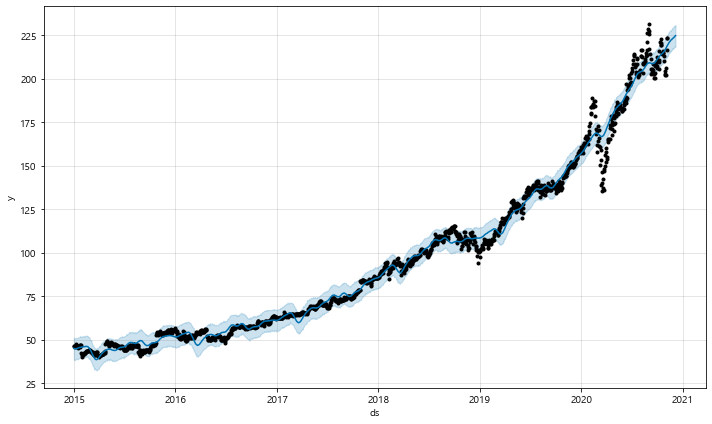

In [36]:
ms_trunc = ms[:'2020-11-7']
df = pd.DataFrame({'ds': ms_trunc.index, 'y': ms_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)

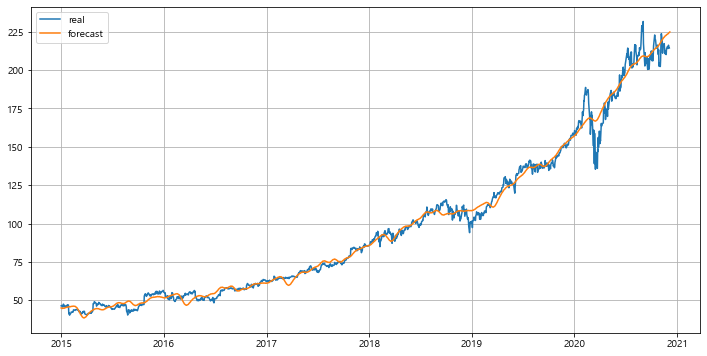

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(ms.index, ms.Close, label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()